In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
%cd /content/drive/MyDrive/DataAnalysis/competicion/competition_Patent-Phrase-to-Phrase-Matching

/content/drive/MyDrive/DataAnalysis/competicion/competition_Patent-Phrase-to-Phrase-Matching


In [3]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [4]:
train.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [5]:
print('train size:', train.shape)
print('test size:', test.shape)

train size: (36473, 5)
test size: (36, 4)


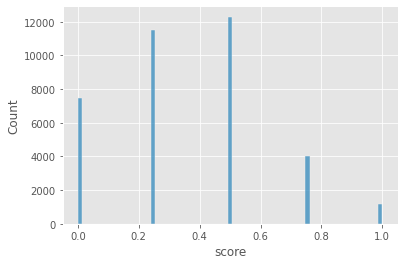

In [9]:
sns.histplot(train['score'])

In [18]:
print(train['score'].value_counts())
print(train['score'].value_counts()/ train.shape[0]*100)

0.50    12300
0.25    11519
0.00     7471
0.75     4029
1.00     1154
Name: score, dtype: int64
0.50    33.723576
0.25    31.582266
0.00    20.483645
0.75    11.046528
1.00     3.163984
Name: score, dtype: float64


# 各スコアにどんなものがあるか見てみよう

In [24]:
# score1
train.loc[train['score'] == 1.00, :].sample(10)

,id,anchor,target,context,score
33721,536074861ac0f759,transport from layer,transport from layers,D04,1.0
27918,d73e7ffc6f3592fe,retaining insert,retaining insertion,H01,1.0
35093,de4c85986c8ef59a,vibratory actuator,vibration actuators,H02,1.0
3375,3e34b82e6890f6ed,belt shifting,belt shift,G11,1.0
29313,74eaf739f11dab1a,seal members,sealing members,G03,1.0
6176,f766973df0c77020,come into relation,come into relationship,B65,1.0
5660,3f8daa67a127ea0e,clods,clods,B07,1.0
36302,57dea28538854ce9,wire grid polarization,wire grid polarizer,B29,1.0
24159,5eba542e92ae4cf4,photocleavable linker,photocleavable linkage,C12,1.0
2935,424b91993338a8df,based method,base method,G01,1.0


- 複数形や態などが違うだけのやつが1になっているらしい

In [23]:
# score0.75
train.loc[train['score'] == 0.75, :].sample(10)

,id,anchor,target,context,score
20383,1620ee0785ae0241,microchambers,micro channels,G01,0.75
1221,ab20b6da866b801e,alumino silicates,silicates,C02,0.75
26754,4e7b5bba1bd238ab,punch face,punch end face,B21,0.75
34484,f822693fb8055141,use as cooling fluid,using as liquid coolant,F24,0.75
15498,d949f24d82d49c96,hexahydro,hexahydride,C13,0.75
3129,7c988d0e76c4ecff,battery cell assembly,li ion assembly,F28,0.75
26550,4ed3bb4c166d0a92,pulping apparatus,pulp machine,D21,0.75
16412,1c0395a1cf2d7882,increase hardness,increases toughness,C08,0.75
32639,b63f58eb1d10dff5,sustained delivery,continuous delivery,C12,0.75
3633,8ce5d6873194bc72,board manufacture,board construction,C04,0.75


- 単語は違えどほぼ同じ意味を持っているペアに割り振られている。

In [25]:
# score0.5
train.loc[train['score'] == 0.5, :].sample(10)

,id,anchor,target,context,score
31047,f91661ccd41b7b19,solder member,lead free solder bump,H01,0.5
26591,9a4b29b3102609a8,pulse width modulated control,variable width pulses,G02,0.5
6584,6a18dec865123af5,composite slurry,composite materials,E21,0.5
18031,c7b7e2b1f41b6e62,lateral power,lateral power diode,H01,0.5
2887,a80dcb87aa66995a,base fuels,fuel,C10,0.5
15266,fa4737909694ba91,hear aid parameters,noise reduction,H04,0.5
35373,52587714a059035a,wafer inspection system,laser projection apparatus,G01,0.5
32901,4069aaf5b6a3ebed,tetracene,phenanthrene,C07,0.5
31776,8ed44121e8dd2e59,stabilizer members,connecting means,A01,0.5
6438,2972adac645e3b69,component composite coating,component oligomeric coating,C09,0.5


- いっしょとは言い難いけど大体同じような意味を持っているもの。

In [26]:
# score0.25
train.loc[train['score'] == 0.25, :].sample(10)

,id,anchor,target,context,score
17184,c84dfbc8a136362d,insulation sleeve,cable core,H01,0.25
12854,985463e4a521f966,final roll,cylinder,B41,0.25
11108,193c80279ba83649,electromagnetic radiation source,information device,B65,0.25
13560,63f38e3fe330a7a0,fluorinated olefin,monomer compound,C08,0.25
25686,30f3bc5ebd690d60,produce liquid hydrocarbons,biogas,C01,0.25
23601,48871b486fe86b17,parallel orientation,fiber orientations,G06,0.25
22519,97e9b126c3862048,outer bar,metal,E01,0.25
12930,d4e4ee3e7a23e7b3,finger actuator,glazing in open space,E05,0.25
30629,e184a9eaae5339ad,silicide formation,growth,B01,0.25
10350,4a107fe4c40c7301,dual clutch,synchronizer,B62,0.25


- 分野は同じでも意味は明確に違うもの。

In [27]:
# score0.0
train.loc[train['score'] == 0.0, :].sample(10)

,id,anchor,target,context,score
27206,64f7dca22f80428d,reduction factor,shifting,H04,0.0
5623,c95f3a63ebfa44c6,clocked storage,store devices,G01,0.0
13911,c1dff6c9ff6456d1,fountain head,bu ber,E03,0.0
21669,2b70f711d9f34ea9,olefin production,chemical additive,B01,0.0
28040,bef564e4fbbafeb8,return structure,data structure,B62,0.0
36219,0268cc133b3d898a,well pump,centrifugal force,E21,0.0
34525,b7675670095f96f0,use in positioning,positioning statement,G01,0.0
10839,7cf98f4b737c8776,electric field intensities,electricity bill,A61,0.0
30520,9ae979403138a50f,shunt reactor,motor rider,H01,0.0
17198,246b6af06c67f664,insulation sleeve,insulux,H01,0.0


- 1ミリも関係ないやつ